# Credit Card Fraud - EDA


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read in data
df=pd.read_csv('CreditCardFraud.csv')

## Investigating data

In [3]:
df.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,1/1/2019 0:00,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,1/1/2019 0:00,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,1/1/2019 0:00,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [4]:
df.shape

(1048575, 23)

In [5]:
print(min(df['trans_date_trans_time'])); print(max(df['trans_date_trans_time']));

1/1/2019 0:00
9/9/2019 9:59


In [6]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1048575 non-null  object 
 1   cc_num                 1048575 non-null  float64
 2   merchant               1048575 non-null  object 
 3   category               1048575 non-null  object 
 4   amt                    1048378 non-null  float64
 5   first                  1048575 non-null  object 
 6   last                   1048575 non-null  object 
 7   gender                 1048575 non-null  object 
 8   street                 1048575 non-null  object 
 9   city                   1048575 non-null  object 
 10  state                  1048575 non-null  object 
 11  zip                    1048575 non-null  int64  
 12  lat                    1048575 non-null  float64
 13  long                   1048575 non-null  float64
 14  city_pop          

In [8]:
# Check if there are duplicated rows
print(df.duplicated().sum()); print(df.duplicated().sum())

0
0


In [9]:
# Check if there are missing values
print(df.isnull().sum()); print(df.isnull().sum())

trans_date_trans_time      0
cc_num                     0
merchant                   0
category                   0
amt                      197
first                      0
last                       0
gender                     0
street                     0
city                       0
state                      0
zip                        0
lat                        0
long                       0
city_pop                   0
job                        0
dob                        0
trans_num                  0
unix_time                  0
merch_lat                  0
merch_long                 0
is_fraud                   0
dtype: int64
trans_date_trans_time      0
cc_num                     0
merchant                   0
category                   0
amt                      197
first                      0
last                       0
gender                     0
street                     0
city                       0
state                      0
zip                        0
l

In [10]:
counts=df['is_fraud'].value_counts()
print(counts)
percentages=counts/len(df)*100
percentages

0    1042569
1       6006
Name: is_fraud, dtype: int64


0    99.427223
1     0.572777
Name: is_fraud, dtype: float64

In [11]:
df['is_fraud'].describe()

count    1.048575e+06
mean     5.727773e-03
std      7.546503e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: is_fraud, dtype: float64

0    0.994272
1    0.005728
Name: is_fraud, dtype: float64


Text(0.5, 1.0, 'Fraud Percentage')

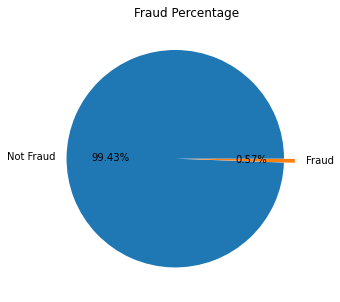

In [12]:
# percentage of fraud
y=df['is_fraud'].value_counts()/df['is_fraud'].value_counts().sum()
print(y)
x=np.array(y)
mylabels=["Not Fraud","Fraud"]
myexplode=[0.1,0]
fig=plt.figure(figsize=(5,5))
plt.pie(x,explode=myexplode,labels=mylabels,autopct='%.2f%%')
plt.title("Fraud Percentage")

In [13]:
# Convert dob and trans_date_trans_time to datetime type
df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'])
df['trans_date']=df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df['trans_date']=pd.to_datetime(df['trans_date'])
df['dob']=pd.to_datetime(df['dob'])

In [14]:
# Cacluate age
df["age"] = df["trans_date"]-df["dob"]
df["age"] = df["age"].astype('timedelta64[Y]') #unit: year

In [15]:
df.age.describe().round(2)

count    1048575.00
mean          45.39
std           17.38
min           13.00
25%           32.00
50%           43.00
75%           56.00
max           95.00
Name: age, dtype: float64

In [16]:
# Calculate distance from customer location to merchant location 
df['distance'] = np.sqrt((df['merch_lat']-df['lat'])**2 +(df['merch_long']-df['long'])**2)*69.17  #unit: mile

In [17]:
#drop unnecessary columns
df = df.drop(['unix_time', 'dob', 'merch_lat', 'merch_long', 'lat', 'long'], axis=1)
print(df.columns); print(df.shape)

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'city_pop',
       'job', 'trans_num', 'is_fraud', 'trans_date', 'age', 'distance'],
      dtype='object')
(1048575, 19)


### EDA

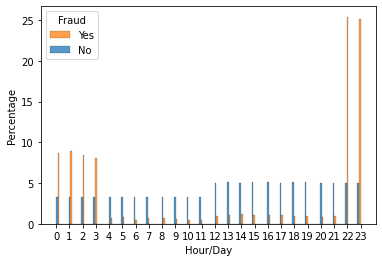

In [18]:
# hour per day vs. is_fraud

df['hour']=pd.to_datetime(df['trans_date_trans_time']).dt.hour
ax=sns.histplot(data=df, x="hour", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Hour/Day')
plt.xticks(np.arange(0,24,1))
plt.legend(title='Fraud', labels=['Yes', 'No'])

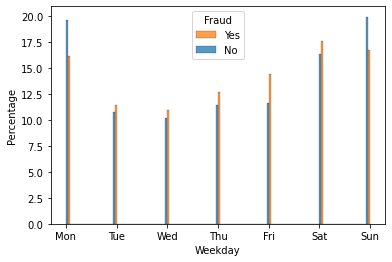

In [19]:
# weekday vs is_fraud

df['weekday']=pd.to_datetime(df['trans_date_trans_time']).dt.dayofweek
ax=sns.histplot(data=df, x="weekday", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Weekday')
ax.set_xticklabels(["", "Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
plt.legend(title='Fraud', labels=['Yes', 'No'])

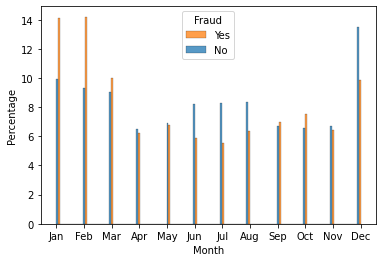

In [40]:
# month vs is_fraud

df['month']=pd.to_datetime(df['trans_date_trans_time']).dt.month
ax=sns.histplot(data=df, x="month", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Month')
plt.xticks(np.arange(1,13,1))
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Fraud', labels=['Yes', 'No'])

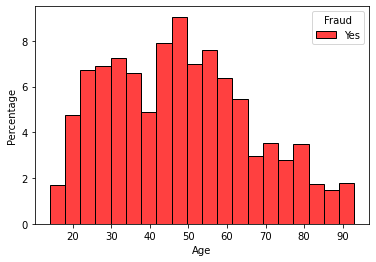

In [20]:
ax=sns.histplot(data=df.loc[df['is_fraud']==1], x="age", bins=20,stat='percent',color='red')
ax.set_ylabel('Percentage')
ax.set_xlabel('Age')
plt.legend(title='Fraud', labels=['Yes', 'No'])

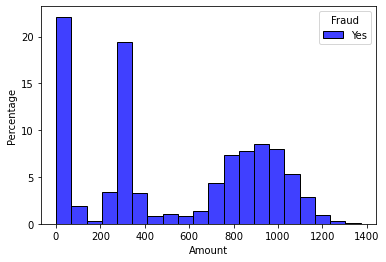

In [21]:
ax=sns.histplot(data=df.loc[df['is_fraud']==1], x="amt", bins=20,stat='percent',color='blue')
ax.set_ylabel('Percentage')
ax.set_xlabel('Amount')
plt.legend(title='Fraud', labels=['Yes', 'No'])

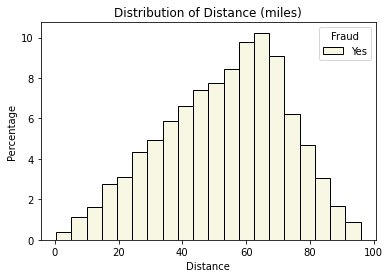

In [22]:
ax=sns.histplot(data=df.loc[df['is_fraud']==1], x="distance", bins=20,stat='percent',color='beige')
ax.set_ylabel('Percentage')
ax.set_xlabel('Distance')
ax.set_title("Distribution of Distance (miles)")
plt.legend(title='Fraud', labels=['Yes', 'No'])

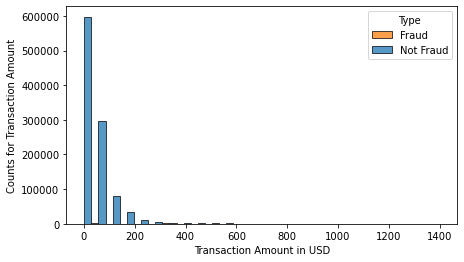

In [23]:
#Transaction Amount vs. Fraud

fig=plt.figure(figsize=(7,4))
ax=sns.histplot(x='amt',data=df[df.amt<=1400],hue='is_fraud',stat='count',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Counts for Transaction Amount')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type',labels=['Fraud','Not Fraud'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f5aa7e4b50>,
 'caps': [<matplotlib.lines.Line2D at 0x1f5aa7f51f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f5aa7e4880>],
 'medians': [<matplotlib.lines.Line2D at 0x1f5aa7f56d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f5aa7f59a0>],
 'means': []}

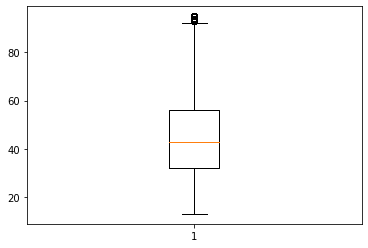

In [24]:
#Age  vs. Fraud

plt.boxplot(df['age'])

In [25]:
values=[80,90]
counts=[]
for value in values:
    count=len(df[df['age']>value])
    counts.append(count)
print(counts)

[45915, 11233]


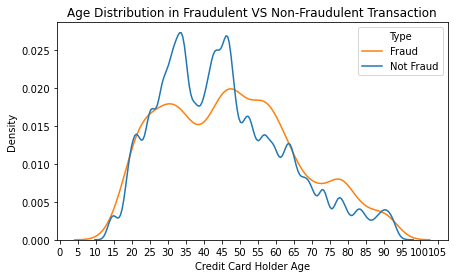

In [27]:
#kdeplot: Kernel Density Estimate Plot
fig=plt.figure(figsize=(7,4))
ax=sns.kdeplot(x='age',data=df,hue='is_fraud',common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Fraudulent VS Non-Fraudulent Transaction')
plt.legend(title='Type',labels=['Fraud','Not Fraud'])

In [28]:
#Gender vs. Fraud

counts=df['gender'].value_counts()
print(counts)
percentages=counts/len(df)*100
percentages

F    573968
M    474607
Name: gender, dtype: int64


F    54.737906
M    45.262094
Name: gender, dtype: float64

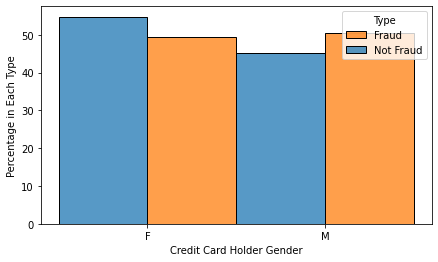

In [29]:
fig=plt.figure(figsize=(7,4))
ax=sns.histplot(x='gender',data=df,hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Type',labels=['Fraud','Not Fraud'])

gas_transport     106430
grocery_pos        99906
home               99578
shopping_pos       94353
kids_pets          91404
shopping_net       78899
entertainment      75981
food_dining        74041
personal_care      73498
health_fitness     69362
misc_pos           64492
misc_net           51082
grocery_net        36719
travel             32830
Name: category, dtype: int64


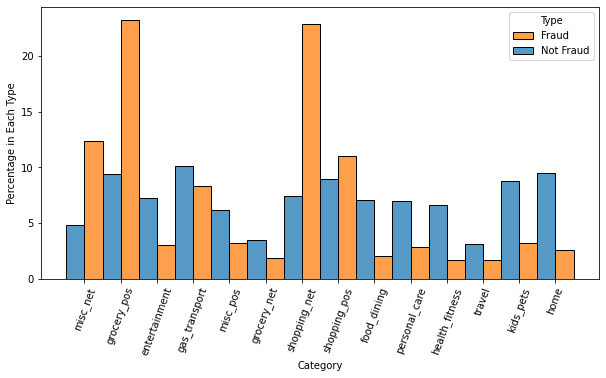

In [30]:
#Sepnding Category vs. Fraud
counts=df['category'].value_counts()
print(counts)
percentages=counts/len(df)*100
percentages
fig=plt.figure(figsize=(10,5))
ax=sns.histplot(x='category',data=df,hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Category')
for tick in ax.get_xticklabels():
    tick.set_rotation(70)
plt.legend(title='Type',labels=['Fraud','Not Fraud'])

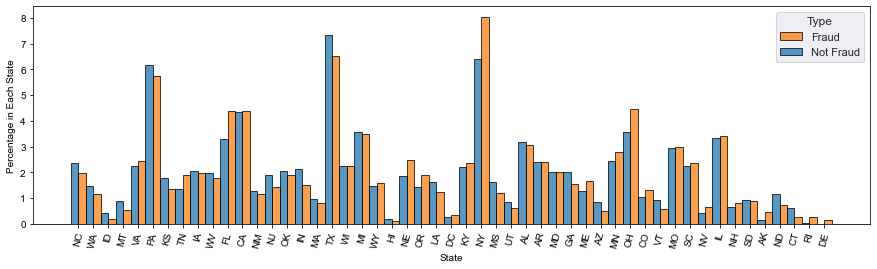

In [31]:
# State vs. Fraud
counts=df['state'].value_counts()
#print(counts)
percentages=counts/len(df)*100
percentages
fig=plt.figure(figsize=(15,4))
ax=sns.histplot(x='state',data=df,hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
sns.set(rc={'xtick.labelsize':11})
ax.set_ylabel('Percentage in Each State')
ax.set_xlabel('State')
for tick in ax.get_xticklabels():
    tick.set_rotation(75)
plt.legend(title='Type',labels=['Fraud','Not Fraud'])

In [32]:
# City vs. Fraud

df['location']=df['city']+','+df['state']
num_cities=df[df["is_fraud"]==1]['location'].nunique()
num_cities

581

In [33]:
# top 20 cities

df_fraud=df[df['is_fraud']==1]
num_cities=df_fraud['location'].nunique()
print("The 'city' column in 'df_fraud' has",num_cities,"unique values")
city_counts=df_fraud['location'].value_counts()
top_20_city=city_counts.head(20)
top_20_city

The 'city' column in 'df_fraud' has 581 unique values


Naples,FL             29
Dallas,TX             27
Detroit,MI            26
San Antonio,TX        25
Albuquerque,NM        24
Aurora,CO             23
New York City,NY      23
Warren,MI             23
Houston,TX            22
Lakeland,FL           21
Washington,DC         21
Fort Washakie,WY      21
Huntsville,AL         20
Albany,NY             20
Kenner,LA             20
Hovland,MN            19
Hubbell,NE            19
Deane,KY              18
West Palm Beach,FL    18
Wichita,KS            18
Name: location, dtype: int64

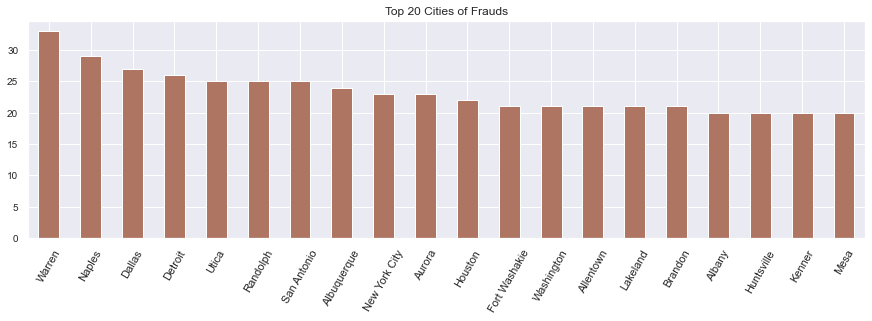

In [34]:
#Top 20 Cities vs. Fraud
import random
def randomcolor():
    r=random.random()
    b=random.random()
    g=random.random()
    rgb=[r,g,b]
    return rgb
fig=plt.figure(figsize=(15,4))
plt.rcParams.update({'font.size':15})
sns.set(rc={'ytick.labelsize':10})
df[df["is_fraud"]==1]["city"].value_counts(sort=True,ascending=False).head(20).plot(kind='bar',color=randomcolor())
plt.title("Top 20 Cities of Frauds")
plt.xticks(rotation=60)
plt.show()

count    1.048575e+06
mean     5.295073e+01
std      1.969282e+01
min      1.650832e-02
25%      3.907047e+01
50%      5.520326e+01
75%      6.760652e+01
max      9.776241e+01
Name: distance, dtype: float64


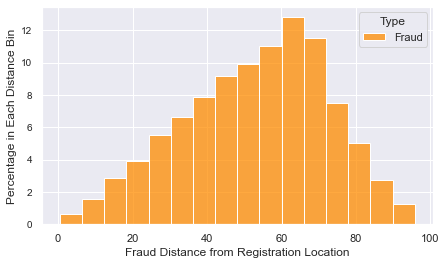

In [38]:
#Fraud Distance from Registration Location

print(df['distance'].describe());

fig=plt.figure(figsize=(7,4))
df_fraud=df[df["is_fraud"]==1]
ax=sns.histplot(x='distance',data=df_fraud,bins=16,stat='percent',color='darkorange')
ax.set_ylabel('Percentage in Each Distance Bin')
ax.set_xlabel('Fraud Distance from Registration Location')
plt.legend(title='Type',labels=['Fraud','Not Fraud'])